In [1]:
import keras
from keras.datasets import imdb
import tensorflow as tf
import numpy as np


2024-11-17 14:05:58.466866: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-17 14:05:58.481530: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-17 14:05:58.491786: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-17 14:05:58.494934: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-17 14:05:58.502496: I tensorflow/core/platform/cpu_feature_guar

In [2]:
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=10000)

In [3]:
# train_data  #单词索引列表

In [4]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i -3, "??") for i in train_data[0]])
decoded_review

"?? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ?? is an amazing actor and now the same being director ?? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ?? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ?? to the two little boy's that played the ?? of norman and paul they were just brilliant children are often left out of the ?? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't

In [6]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i , sequence in enumerate(sequences):
        for j in sequence:
            results[i,j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [7]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32") #转化为float32
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [8]:
model = keras.Sequential(
    [keras.layers.Dense(16, activation="relu"),# 16个单元对应的权重矩阵W的形状为(input_dimension, 16)
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
    ]
)


In [9]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

I0000 00:00:1731823564.011966    8300 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1731823564.096655    8300 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1731823564.096709    8300 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1731823564.099483    8300 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1731823564.099601    8300 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

In [10]:
x_val = x_train[:10000]
partical_x_train = x_train[10000:]
y_val = y_train[:10000]
partical_y_train = y_train[10000:]

In [11]:
tf_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")

In [12]:
history = model.fit(
    partical_x_train,
    partical_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
    callbacks=[tf_callback]
)

# history = model.fit(
#     partical_x_train,
#     partical_y_train,
#     epochs=20,
#     batch_size=512)


Epoch 1/20


I0000 00:00:1731823569.151488    8353 service.cc:146] XLA service 0x7feb04019170 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731823569.151542    8353 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 SUPER, Compute Capability 7.5
2024-11-17 14:06:09.165820: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-17 14:06:09.229354: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90101


17/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6408 - loss: 0.6344

I0000 00:00:1731823569.749417    8353 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.6963 - loss: 0.5912 - val_accuracy: 0.8639 - val_loss: 0.3902
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8949 - loss: 0.3307 - val_accuracy: 0.8722 - val_loss: 0.3245
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9195 - loss: 0.2458 - val_accuracy: 0.8870 - val_loss: 0.2823
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9376 - loss: 0.1940 - val_accuracy: 0.8858 - val_loss: 0.2805
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9488 - loss: 0.1600 - val_accuracy: 0.8802 - val_loss: 0.2949
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9600 - loss: 0.1330 - val_accuracy: 0.8815 - val_loss: 0.3075
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9638 - loss: 0.1218 - val_accuracy: 0.8752 - val_loss: 0.3173
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9703 - loss: 0.1016 - val_accuracy: 0.8738 - val_loss: 0.3317

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 320,612 (1.22 MB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 160,307 (626.20 KB)

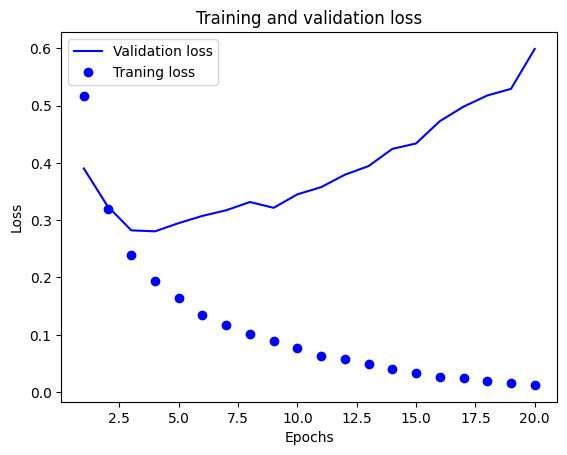

In [14]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.plot(epochs, loss_values, "bo", label="Traning loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

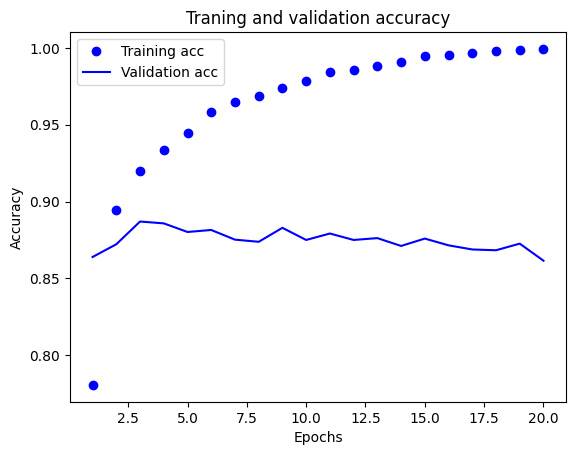

In [15]:
plt.clf()
acc= history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label = "Training acc")
plt.plot(epochs, val_acc, "b", label = "Validation acc")
plt.title("Traning and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()